In [1]:
# Importing Libs
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.offline as py 
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
py.init_notebook_mode(connected = True)
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


<ipython-input-1-9c73ad1c5520>:20: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [2]:
# Importing CSV files from system
anl = pd.read_csv('C:/Users/Micheal Chukwuebuka/Downloads/archive (3)/annual_csv.csv')
mnty = pd.read_csv('C:/Users/Micheal Chukwuebuka/Downloads/archive (3)/monthly_csv.csv')

# Data Visualization and Exploratory Data Analysis.

In [3]:
anl.head(5)

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [4]:
mnty.head(5)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
anl.info()
mnty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    70 non-null     object 
 1   Price   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [6]:
anl['Price'].plot(kind = 'line', title = "Annual Gold prices from 1950 to 2020")

In [7]:
mnty['Price'].plot(kind = 'line', title = "Annual Gold prices from 1950 to 2020")

In [8]:
mnty['EMA_12'] = mnty['Price'].ewm(span = 12, adjust = False).mean()
mnty['EMA_24'] = mnty['Price'].ewm(span = 24, adjust = False).mean()
mnty['diff'] = mnty['Price'].diff()
anl['diff'] = anl['Price'].diff()

In [9]:
mnty.head(5)

,Date,Price,EMA_12,EMA_24,diff
0,1950-01,34.73,34.73,34.73,NaN
1,1950-02,34.73,34.73,34.73,0.0
2,1950-03,34.73,34.73,34.73,0.0
3,1950-04,34.73,34.73,34.73,0.0
4,1950-05,34.73,34.73,34.73,0.0


In [10]:
mnty['diff']=mnty['diff'].fillna(mnty['diff'].median())

In [11]:
mnty.head(5)

,Date,Price,EMA_12,EMA_24,diff
0,1950-01,34.73,34.73,34.73,0.0
1,1950-02,34.73,34.73,34.73,0.0
2,1950-03,34.73,34.73,34.73,0.0
3,1950-04,34.73,34.73,34.73,0.0
4,1950-05,34.73,34.73,34.73,0.0


In [12]:
#Numerical data
mnty['Price'] = mnty['Price'].astype('float64')
anl['Price'] = anl['Price'].astype('float64')

#Date Data
mnty['Date'] = pd.to_datetime(mnty['Date'])
anl['Date'] = pd.to_datetime(anl['Date'])

mnty.set_index('Date', inplace = True)
anl.set_index('Date', inplace = True)

In [13]:
mnty.plot(kind = 'line', title = "Monthly Gold Prices against Exponential Moving Avg (Span = 12 and 24 months) and price difference")

In [14]:
mnty.head(5)

,Price,EMA_12,EMA_24,diff
Date,,,,
1950-01-01,34.73,34.73,34.73,0.0
1950-02-01,34.73,34.73,34.73,0.0
1950-03-01,34.73,34.73,34.73,0.0
1950-04-01,34.73,34.73,34.73,0.0
1950-05-01,34.73,34.73,34.73,0.0


In [15]:
group_labels_anl = ['Annual Gold Price Data']
fig1 = ff.create_distplot([anl['Price']], group_labels = group_labels_anl, show_hist = False)
fig1.update_layout(title_text= "Annual gold price data distribution")
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(anl['Price'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(anl['Price'])))
fig1.show()

Kurtosis of normal distribution: 0.8861150027239906
Skewness of normal distribution: 1.3631918383841741


In [16]:
group_labels_mnty = ['Annual Gold Price Data']
fig2 = ff.create_distplot([mnty['Price']], group_labels = group_labels_mnty, show_hist = False)
fig2.update_layout(title_text= "Annual gold price data distribution")
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(mnty['Price'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(mnty['Price'])))
fig2.show()

Kurtosis of normal distribution: 0.866728594830064
Skewness of normal distribution: 1.381181998044922


In [17]:
mnty['diff'].iloc[0] = 0
anl['diff'].iloc[0] = 0

In [18]:
mnty.describe()

,Price,EMA_12,EMA_24,diff
count,847.000000,847.000000,847.000000,847.000000
mean,416.556906,406.309070,396.609295,2.132322
std,453.665313,440.954087,429.780080,24.917487
min,34.490000,34.618477,34.652881,-112.755000
25%,35.190000,35.229546,35.203975,-3.229000
50%,319.622000,326.695728,327.547473,0.000000
75%,447.029000,435.671294,425.315215,5.114000
max,1840.807000,1667.694712,1594.215401,210.914000


In [19]:
anl.describe()

,Price,diff
count,70.000000,70.000000
mean,412.776457,20.647214
std,444.932209,103.737983
min,34.660000,-465.754000
25%,35.277500,-5.844250
50%,320.803500,0.115000
75%,458.943500,46.175500
max,1687.342000,315.072000


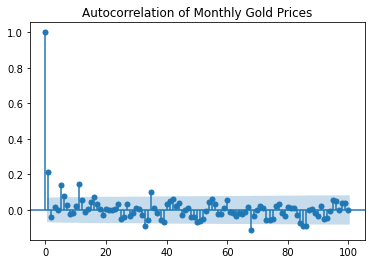

In [20]:
# Draw Plot
plot_acf(mnty['diff'].tolist(), lags=100, title = 'Autocorrelation of Monthly Gold Prices')
plt.show()

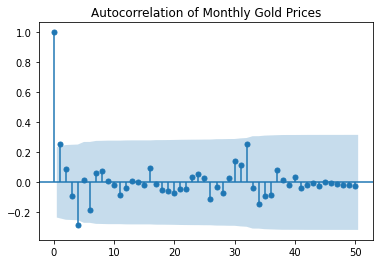

In [21]:
plot_acf(anl['diff'].tolist(), lags=50, title = 'Autocorrelation of Monthly Gold Prices')
plt.show()

In [22]:
#Data Source: https://ourworldindata.org/grapher/gold-production
#Data Description: Annual gold production, measured in metric tons per year.

gpd = pd.read_csv("C:/Users/Micheal Chukwuebuka/Downloads/gold-production.csv")
gpd['Entity'] = gpd['Entity'].astype('category')
gpd['Code'] = gpd['Code'].astype('category')

gpw = gpd[gpd['Code'] == "OWID_WRL"]
gpw.set_index('Year', inplace = True)

In [23]:
gpw.head(5)

,Entity,Code,Gold Production (Clio-Infra & USGS)
Year,,,
1681,World,OWID_WRL,6
1682,World,OWID_WRL,6
1683,World,OWID_WRL,6
1684,World,OWID_WRL,6
1685,World,OWID_WRL,6


In [24]:
gpw['Gold Production (Clio-Infra & USGS)'].plot(kind = 'line', title = "Global gold production data recorded from 1681 to 2015")

In [25]:
df1 = anl[anl.index <= "2016"]['Price'].tolist()
df2 = gpw[gpw.index >= 1950]['Gold Production (Clio-Infra & USGS)'].tolist()
out = zip(df1, df2)
idx = anl.index.tolist()
idx = [x for x in idx if x <= datetime.datetime(2016, 1, 12)]
cnct_gpw = pd.DataFrame(out, columns = ['Price', 'Production'], index = idx)

In [26]:
cnct_gpw.plot(kind = 'line', title = 'Global gold price vs production from 1950 to 2015.')

In [27]:
wiki_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_stock_market_crashes_and_bear_markets")


In [28]:
wiki_df[0].drop(['Unnamed: 4', 'Country'], axis = 1)

,Name,Date,Causes
0,Tulip mania Bubble,1637,"A bubble (1633–37) in the Netherlands during which contracts for bulbs of tulips reached extraordinarily high prices, and suddenly collapsed"
1,The Mississippi Bubble,1720,Banque Royale by John Law stopped payments of its note in exchange for specie and as result caused economic collapse in France.
2,South Sea Bubble of 1720,1720,"Affected early European stock markets, during early days of chartered joint stock companies"
3,Bengal Bubble of 1769,1769,"Primarily caused by the British East India Company, whose shares fell from £276 in December 1768 to £122 in 1784"
4,Credit crisis of 1772,1772,NaN
5,Financial Crisis of 1791–92,1791,Shares of First bank of US boom and bust in Aug and Sept 1791. Groundwork of Alexander Hamilton's cooperation with the Bank of New York to end this event would be crucial in ending the Panic of 1792 next year.
6,Panic of 1796–97,1796,A series of downturns in Atlantic credit markets led to broader commercial downturns in Great Britain and the United States.
7,Panic of 1819,1819,NaN
8,Panic of 1825,1825,NaN
9,Panic of 1837,10 May 1837,NaN
